In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
!pip install yfinance
import yfinance as yf


In [3]:
start = pd.to_datetime('2019-01-01')
end = pd.to_datetime('2024-03-26')

In [4]:
aapl = yf.download("AAPL", start, end)
msft = yf.download("MSFT", start, end)
googl = yf.download("GOOGL", start, end)
nvda = yf.download("NVDA", start, end)

aapl.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845043,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530048,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450970,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200


In [5]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1316 entries, 2019-01-02 to 2024-03-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1316 non-null   float64
 1   High       1316 non-null   float64
 2   Low        1316 non-null   float64
 3   Close      1316 non-null   float64
 4   Adj Close  1316 non-null   float64
 5   Volume     1316 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 72.0 KB


In [6]:
aapl = aapl[['Adj Close']]
msft = msft[['Adj Close']]
googl = googl[['Adj Close']]
nvda = nvda[['Adj Close']]

In [7]:
googl.tail()

,Adj Close
Date,
2024-03-19,147.029999
2024-03-20,148.740005
2024-03-21,147.600006
2024-03-22,150.770004
2024-03-25,150.070007


# Allocation

25% in Apple, 25% in Microsoft, 25% in Aplhabet, 25% in Nvida. total initial investment was $100,000

In [8]:
for stock_df in (aapl, msft, googl, nvda):
    stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

C:\Users\racon\AppData\Local\Temp\ipykernel_26356\4227814639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']


In [9]:
for stock_df, allo in zip((aapl, msft, googl, nvda),[0.25, 0.25, 0.25, 0.25]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

C:\Users\racon\AppData\Local\Temp\ipykernel_26356\1743624887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Allocation'] = stock_df['Normed Return']*allo


In [10]:
for stock_df in (aapl, msft, googl, nvda):
    stock_df['Position Amount'] = stock_df['Allocation']*100000

C:\Users\racon\AppData\Local\Temp\ipykernel_26356\855840940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Position Amount'] = stock_df['Allocation']*100000


# Portfolio Value



<Axes: xlabel='Date'>

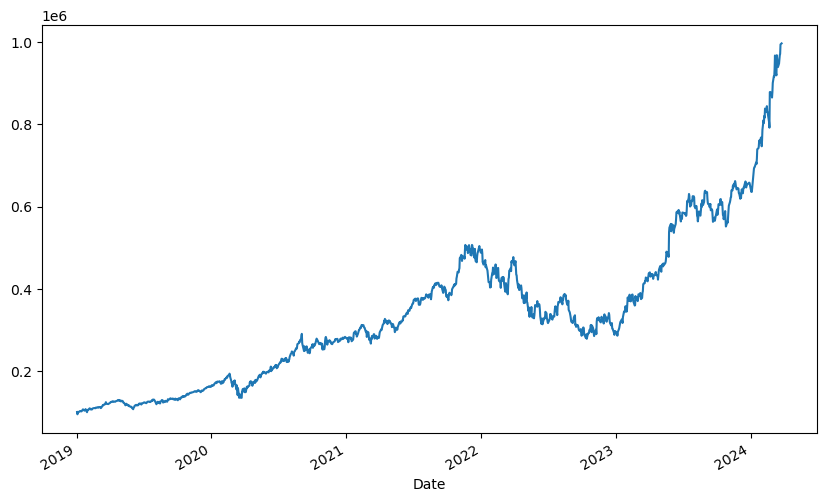

In [11]:
total_pos_vals = [aapl['Position Amount'], msft['Position Amount'], googl['Position Amount'], nvda['Position Amount']]
portf_vals = pd.concat(total_pos_vals, axis = 1)
portf_vals.columns = ['Apple Pos', 'Microsoft Pos', 'Alphabet Pos', 'Nvidia Pos']
portf_vals['Total Pos'] = portf_vals.sum(axis = 1)
portf_vals['Total Pos'].plot(figsize = (10,6))

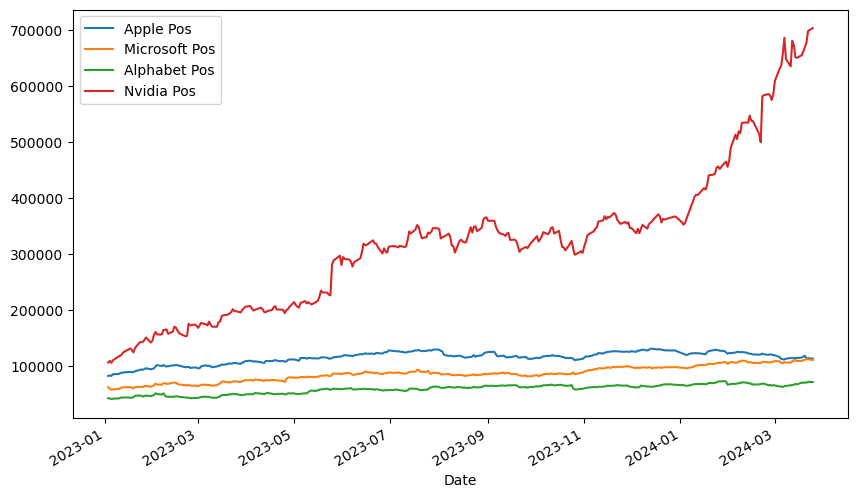

In [12]:
portf_vals['2023-01-01':].drop('Total Pos', axis = 1).plot(figsize = (10,6));

# Portfolio Statistical Analysis


In [13]:
portf_vals['Daily Return'] = portf_vals['Total Pos'].pct_change(1)
portf_vals.dropna(inplace = True)
print('Average Daily Return: ', portf_vals['Daily Return'].mean())
print('Daily Return Standard Deviation: ', portf_vals['Daily Return'].std())

Average Daily Return:  0.001991983135842953
Daily Return Standard Deviation:  0.022001714546574784


#### Histogram and KDE plot

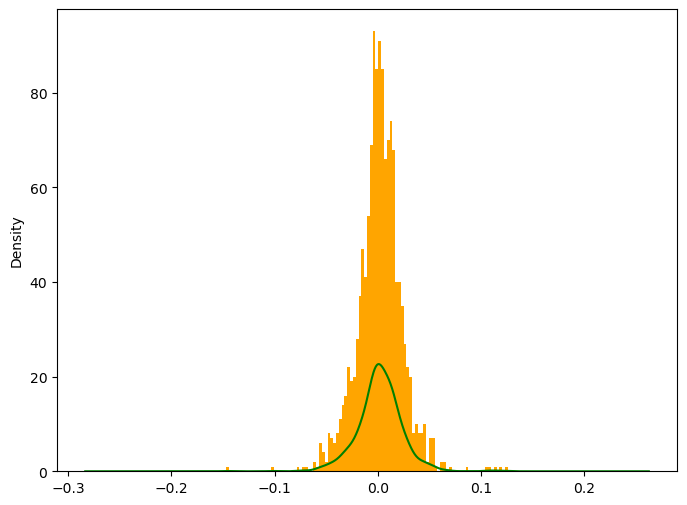

In [14]:
portf_vals['Daily Return'].plot(kind = 'hist', bins = 100, figsize = (6,8), color = 'orange')
portf_vals['Daily Return'].plot(kind = 'kde', figsize = (8,6), color = 'green');

In [15]:
cumulative_return = 100*(portf_vals['Total Pos'][-1] / portf_vals['Total Pos'][0]-1)
print('Cumulative return: ', cumulative_return)

Cumulative return:  956.5104372674856


#### Sharpe Ratio

In [17]:
# Daily Sharpe Ratio
SR = portf_vals['Daily Return'].mean() / portf_vals['Daily Return'].std()
print('Sharpe Ratio: ', SR)

Sharpe Ratio:  0.09053763203891144


In [18]:
# Annuallised Sharpe Ratio
ASR = (252**0.5) * SR
print('Annualised Sharpe Ratio: ', ASR)

Annualised Sharpe Ratio:  1.4372403520058006


#### Allocation Optimisation

In [193]:
stocks = pd.concat([aapl['Adj Close'], msft['Adj Close'], googl['Adj Close'], nvda['Adj Close']], axis = 1)
stocks.columns = ['Apple', 'Microsoft', 'Alphabet', 'Nvida']
stocks.head()

,Apple,Microsoft,Alphabet,Nvida
Date,,,,
2019-01-02,37.845036,95.846031,52.734001,33.788902
2019-01-03,34.075390,92.320045,51.273499,31.747471
2019-01-04,35.530045,96.613770,53.903500,33.781448
2019-01-07,35.450966,96.736992,53.796001,35.569862
2019-01-08,36.126778,97.438393,54.268501,34.684345


In [194]:
# Calculating Mean Daily Return

stocks.pct_change(1).mean()

Apple        0.001348
Microsoft    0.001309
Alphabet     0.000995
Nvida        0.003068
dtype: float64

In [195]:
# Calcualting Correlation between stocks

stocks.pct_change(1).corr()

,Apple,Microsoft,Alphabet,Nvida
Apple,1.000000,0.752009,0.669919,0.639621
Microsoft,0.752009,1.000000,0.753315,0.698981
Alphabet,0.669919,0.753315,1.000000,0.611632
Nvida,0.639621,0.698981,0.611632,1.000000


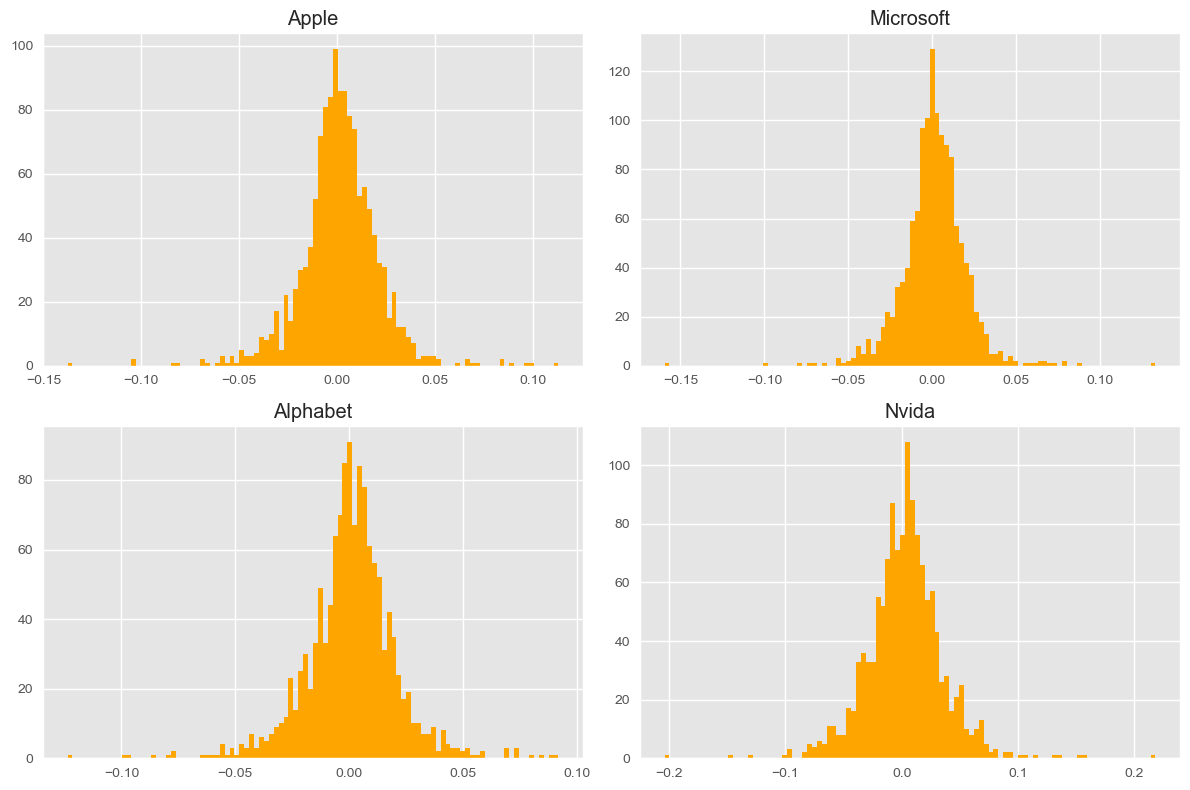

In [196]:
log_returns = np.log(stocks / stocks.shift(1))
log_returns.hist(bins = 100, figsize = (12,8), color = 'orange')
plt.pyplot.tight_layout()

In [197]:
# Covariance

log_returns.cov()*252

,Apple,Microsoft,Alphabet,Nvida
Apple,0.101446,0.072320,0.067938,0.106137
Microsoft,0.072320,0.090642,0.072049,0.109281
Alphabet,0.067938,0.072049,0.100567,0.100870
Nvida,0.106137,0.109281,0.100870,0.265091


#### Portfolio A Sharpe Ratio

In [198]:
np.random.seed(101)
print(stocks.columns)

weights = np.array(np.random.random(4))

print('Random Weights: ')
print(weights)


# Sum equals to 100

print('rebalance')
weights = weights / np.sum(weights)
print(weights)

Index(['Apple', 'Microsoft', 'Alphabet', 'Nvida'], dtype='object')
Random Weights: 
[0.51639863 0.57066759 0.02847423 0.17152166]
rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]


In [199]:
# Expected Return

exp_ret = np.sum((log_returns.mean() * weights) * 252)
print('Expected Porfolio Return: ', exp_ret)

Expected Porfolio Return:  0.33165058064562214


In [200]:
# Expected Volatility

exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
print('expected Volatility: ', exp_vol)

expected Volatility:  0.30350880704951455


In [201]:
# sharpe Ratio

SR = exp_ret / exp_vol
print('Sharpe Ratio: ', SR)

Sharpe Ratio:  1.092721439847762


# Portfolio Optimisation 

In [202]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)


for ind in range(num_ports):
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights
    ret_arr[ind] = np.sum((log_returns.mean() * weights) * 252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

In [203]:
sharpe_arr.max()

1.2470533504663401

In [204]:
# Index location of best allocation

sharpe_arr.argmax()

2467

In [205]:
# optimal allocation for this portfolio

all_weights[sharpe_arr.argmax(), :]

array([0.15455929, 0.16195979, 0.00379717, 0.67968376])

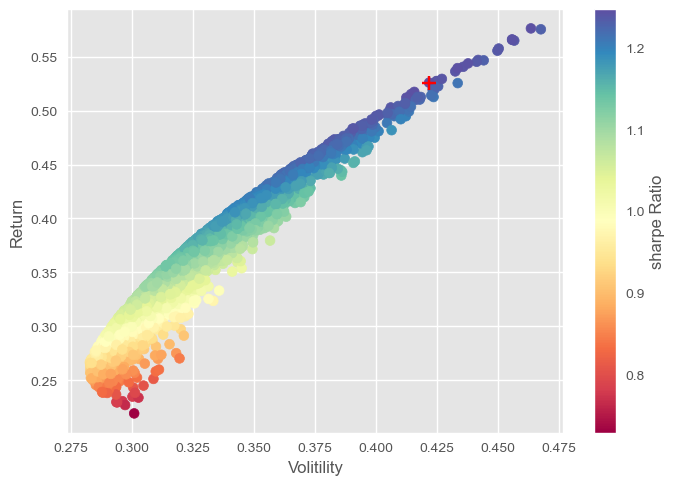

In [221]:
# plot

plt.style.use('ggplot')
plt.pyplot.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'Spectral')
plt.pyplot.colorbar(label = 'sharpe Ratio')
plt.pyplot.xlabel('Volitility')
plt.pyplot.ylabel('Return')


# Max Sparpe ratio indicatior

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.pyplot.scatter(max_sr_vol,max_sr_ret, c = 'red', marker = '+', s = 100);

# Conclusion

The optimal Sharpe ratio is 1.25 and the optimal portfolio allocation is 15% in Apple, 16% in Microsoft, 0.4% in Alphabet, and 68% in Nvidia. So, I would recommend removing Alphabet shares to something more profitable.